In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib created a temporary config/cache directory at C:\Users\82103\AppData\Local\Temp\matplotlib-9bpvbcok because the default path (C:\Users\82103\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv('Kor_income.csv')
cpi_df = pd.read_excel('Kor_cpi.xlsx')

# 전처리 진행

In [3]:
#필요없는 칼럼 삭제
del df['Unnamed: 0']
del df['id']
del df['wave']
del df['religion']
#year age로 바꾸기
df['year_born'] = df['year']-df['year_born']+1
df.rename(columns={'year_born' : 'age'}, inplace = True)

In [4]:
df[df['income']<0]
df.drop(df[df['income'] < 0].index, inplace=True)

In [5]:
cpi_df.rename(columns={'소비자물가 총지수(2020=100)' : 'cpi'}, inplace = True)
#통계청 자료 전처리
cpi_df = cpi_df.iloc[[1, 2], :]
cpi_df = cpi_df.dropna(axis=1)
cpi_df = cpi_df.T
cpi_df = cpi_df.reset_index(drop=True)
cpi_df.columns = ["year", "cpi"]
cpi_df['year'] = cpi_df['year'].astype(int)
cpi_df['cpi'] = cpi_df['cpi'].astype(float)

In [6]:
cpi_dict = cpi_df.set_index('year')['cpi'].to_dict()
# 인플레이션 적용
cpi_2020 = 100.0 #기준

# 인플레이션 데이터를 딕셔너리 형태로 변환
cpi_dict = dict(zip(cpi_df["year"], cpi_df["cpi"]))

# 인플레이션을 고려해 income 데이터를 수정
for index, row in df.iterrows():
    year = row["year"]
    income = row["income"]
    inflation_rate = cpi_2020 / cpi_dict[year]
    df.at[index, "income"] = income * inflation_rate

<AxesSubplot:ylabel='income'>

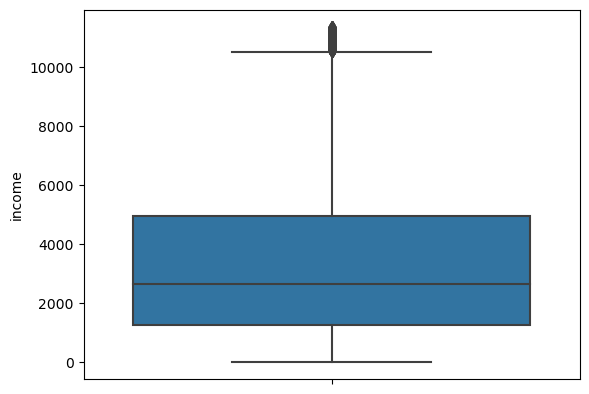

In [7]:
#이상치 정리
Q1 = df['income'].quantile(0.25) #income에서 1분위 계산
Q3 = df['income'].quantile(0.75) #income에서 3분위 계산
IQR = Q3 - Q1
df = df[(df['income'] >= Q1 - 1.5*IQR) & (df['income'] <= Q3 + 1.5*IQR)] #이상치 제거 진행

sns.boxplot(x=None, y="income", data=df)

In [8]:
#20살 이하 미성년자 계층 삭제
#del df[df['age']<20]

In [9]:
#공백을 결측치로
df.replace(' ', np.nan, inplace=True)

In [10]:
#occupation 정리
df.drop(df[df['occupation'] == 9999].index, inplace=True)
df['occupation'] = df['occupation'].str[0]
df['occupation'].unique()

array(['6', nan, '5', '9', '2', '8', '4', '7', '3', '1'], dtype=object)

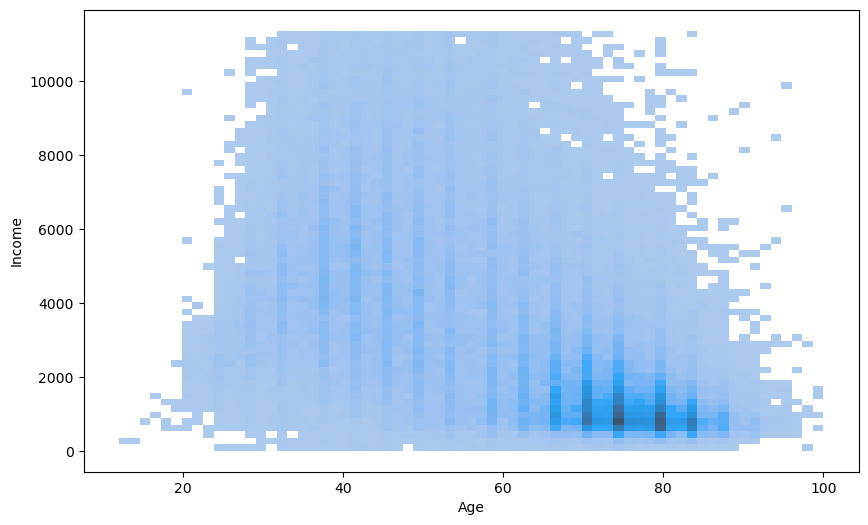

In [11]:
#나이
plt.figure(figsize=(10, 6))
sns.histplot(x='age', y='income', data=df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


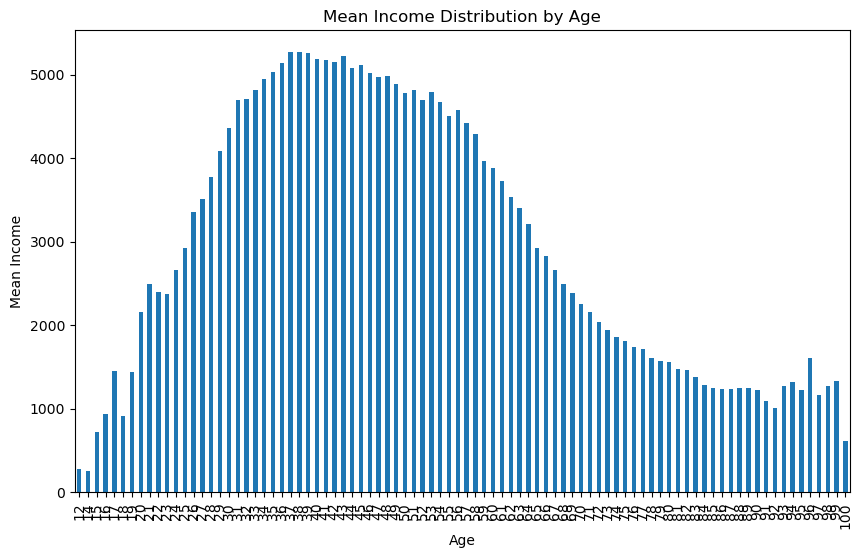

In [12]:
mean_income_by_age = df.groupby('age')['income'].mean()

plt.figure(figsize=(10, 6))
mean_income_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Mean Income')
plt.title('Mean Income Distribution by Age')
plt.show()

In [13]:
age_ranges = [19, 25, 30, 35, 40, 50, 60, np.inf]
age_labels = ['19-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60+']

df['age'] = pd.cut(df['age'], bins=age_ranges, labels=age_labels, right=False)

In [14]:
#marriage 처리
df.drop(df[df['marriage'] == 9].index, inplace=True)
df.drop(df[df['marriage'] == 0].index, inplace=True)

In [15]:
df[(df['marriage']==1)] ##왜???? 기타에 분류???

,year,region,family_member,gender,age,education_level,marriage,occupation,company_size,reason_none_worker,income
1,2018,4,3,1,60+,5,1,NaN,NaN,9,1728.557013
3,2011,4,5,1,60+,3,1,6,1,NaN,4771.968854
4,2017,4,2,1,60+,2,1,NaN,NaN,10,1647.540984
5,2007,3,3,1,60+,4,1,9,3,NaN,1925.641026
6,2005,2,2,1,60+,5,1,NaN,NaN,NaN,2469.086022
...,...,...,...,...,...,...,...,...,...,...,...
78921,2018,4,2,1,60+,4,1,6,1,NaN,3757.820383
78923,2007,2,4,1,40-49,5,1,9,5,NaN,7512.820513
78924,2006,2,4,1,35-39,5,1,5,2,NaN,4919.842313
78925,2006,2,4,1,60+,2,1,NaN,NaN,7,3728.569271


In [16]:
df[df['marriage']==5]

,year,region,family_member,gender,age,education_level,marriage,occupation,company_size,reason_none_worker,income
8,2016,3,3,1,50-59,7,5,NaN,NaN,NaN,1638.830898
42,2018,1,2,1,50-59,4,5,7,1,NaN,3214.934410
61,2014,3,1,1,25-29,7,5,3,10,NaN,4509.554140
92,2005,5,1,1,25-29,6,5,9,2,NaN,2799.731183
97,2010,3,2,1,50-59,5,5,6,1,NaN,1525.462963
...,...,...,...,...,...,...,...,...,...,...,...
78890,2015,4,2,2,25-29,6,5,2,3,NaN,3236.037935
78892,2011,5,2,1,30-34,6,5,9,3,NaN,6516.129032
78900,2010,6,2,1,40-49,5,5,6,1,NaN,1221.064815
78904,2009,7,1,1,19-24,7,5,5,1,NaN,2016.686532


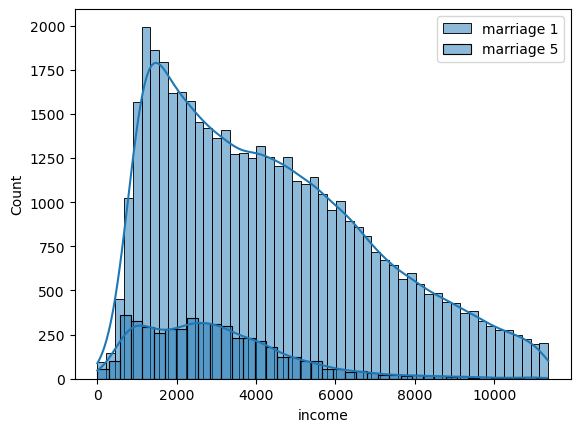

In [17]:
income_1 = df[df['marriage'] == 1]['income']
income_5 = df[df['marriage'] == 5]['income']

sns.histplot(income_1, kde=True, label='marriage 1')
sns.histplot(income_5, kde=True, label='marriage 5')
plt.legend()
plt.show()

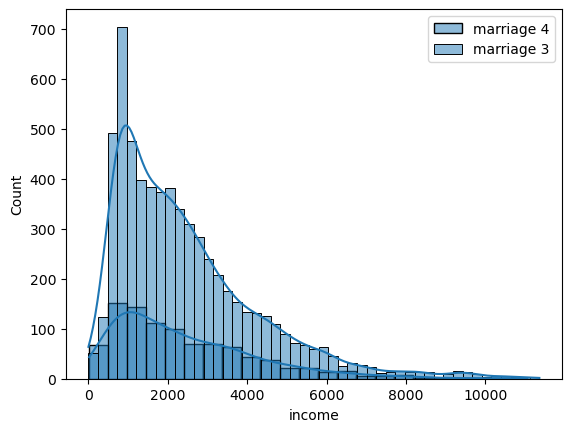

In [18]:
income_4 = df[df['marriage'] == 4]['income']
income_3 = df[df['marriage'] == 3]['income']

sns.histplot(income_4, kde=True, label='marriage 4')
sns.histplot(income_3, kde=True, label='marriage 3')
plt.legend()
plt.show()

In [19]:
df['marriage'].replace({1:6, 4:3}, inplace = True)
df['marriage'].unique()

array([2, 6, 3, 5], dtype=int64)

In [20]:
#education level 정리
#df['education_level'] = df['education_level'].replace({7:6})
#df['education_level'] = df['education_level'].replace({2:1, 3:2, 4:3, 5:4, 6:5, 8:6, 9:7})
#plt.figure(figsize=(10, 6))
#sns.barplot(x='education_level', y='income', data=df, ci=None)
#plt.xlabel('education level')
#plt.ylabel('income mean')
#plt.show()

In [21]:
#region 정리 (수도권/지방권)
df['region'] = df['region'].apply(lambda x: 1 if int(x) in [1,2] else 0)

## 무직자/재직자 따로 데이터 전처리

In [22]:
#재직자 데이터 프레임 따로 제작
df_w = df[(~df['occupation'].isna()) & (df['reason_none_worker'].isna())]
del df_w['reason_none_worker']
del df_w['year']

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1078676339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['education_level'] = df_w['education_level'].replace({7:6})
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1078676339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['education_level'] = df_w['education_level'].replace({2:1, 3:2, 4:3, 5:4, 6:5, 8:6, 9:7})


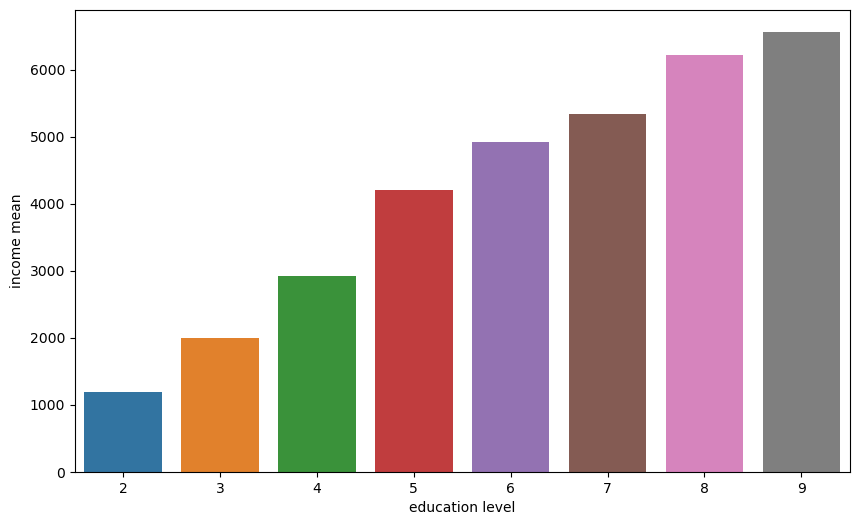

In [23]:
#education level 정리
df_w['education_level'] = df_w['education_level'].replace({7:6})
df_w['education_level'] = df_w['education_level'].replace({2:1, 3:2, 4:3, 5:4, 6:5, 8:6, 9:7})
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='income', data=df, ci=None)
plt.xlabel('education level')
plt.ylabel('income mean')
plt.show()

In [24]:
#company size 정리
df_w['company_size'] = df_w['company_size'].astype('int')
throw_index = df_w[df_w['company_size']==99].index
df_w = df_w.drop(throw_index)
df_w['company_size'].unique()

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1424741759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['company_size'] = df_w['company_size'].astype('int')


array([ 1,  3, 10,  9,  2,  7, 11,  4,  6,  8,  5])

In [25]:
df_w[df_w['company_size']==11]

,region,family_member,gender,age,education_level,marriage,occupation,company_size,income
39,1,4,1,50-59,2,6,9,11,6684.027778
268,1,3,1,40-49,4,2,5,11,2392.473118
296,0,4,1,40-49,5,6,9,11,2295.663601
563,1,2,1,60+,4,6,7,11,5230.070636
569,0,1,1,25-29,5,5,9,11,3387.096774
...,...,...,...,...,...,...,...,...,...
78192,0,2,1,60+,2,6,9,11,1637.096774
78484,0,2,1,30-34,4,6,9,11,4623.655914
78514,0,2,2,60+,2,3,4,11,1888.888889
78630,0,4,1,40-49,4,6,6,11,8115.468410


In [26]:
mean_income = df_w.groupby('company_size')['income'].mean()
std_income = df_w.groupby('company_size')['income'].std()

table = pd.DataFrame({'mean income': mean_income, 'std': std_income})
table.index.name = 'company Size'
table.reset_index(inplace=True)
table

table = table.sort_values(by='mean income', ascending=True)
table

,company Size,mean income,std
10,11,3319.100588,2167.052371
0,1,3551.439982,2397.457282
1,2,4336.276510,2295.529424
2,3,4356.628041,2324.092528
3,4,4546.563885,2393.129926
5,6,4966.412129,2364.107158
4,5,4966.570594,2404.652396
6,7,5144.014160,2428.927959
7,8,5577.670364,2389.707170
8,9,6096.346111,2606.203546


In [27]:
df_w['company_size'] = df_w['company_size'].replace({11: 1, 3:2, 4:3, 5:3, 6:3, 7:4, 8:5, 9:6, 10:7})

In [28]:
mean_income = df_w.groupby('company_size')['income'].mean()
std_income = df_w.groupby('company_size')['income'].std()

table = pd.DataFrame({'mean income': mean_income, 'std': std_income})
table.index.name = 'company Size'
table.reset_index(inplace=True)
table

table = table.sort_values(by='mean income', ascending=True)
table

,company Size,mean income,std
0,1,3548.200053,2394.510071
1,2,4347.092621,2310.657919
2,3,4775.550416,2398.842827
3,4,5144.014160,2428.927959
4,5,5577.670364,2389.707170
5,6,6096.346111,2606.203546
6,7,6847.511389,2405.697157


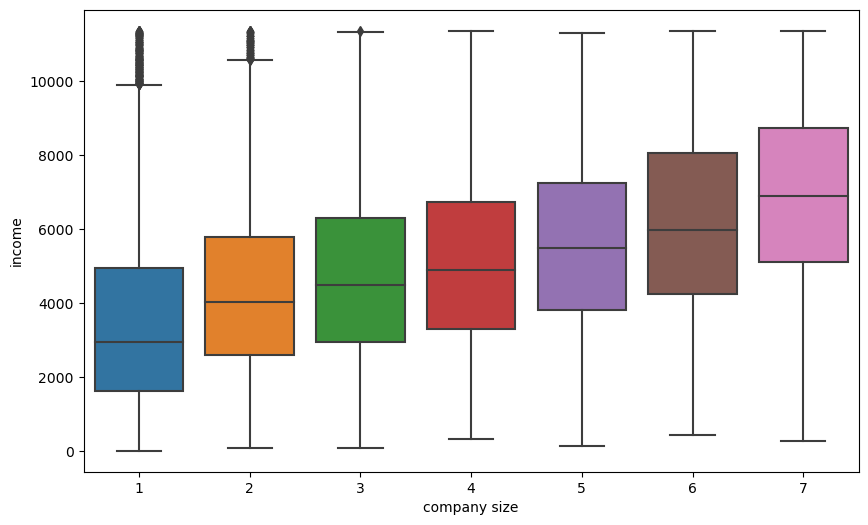

In [29]:
data = df_w[['company_size', 'income']]
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='income', data=data)
plt.xlabel('company size')
plt.ylabel('income')
plt.show()

# 사분위 밖에 있는 값을 1로 설정

In [30]:
df_company_1 = df_w[df_w['company_size'] == 1]
Q3_company_1 = df_company_1['income'].quantile(0.75)
outlier_threshold_1 = 1.5 * Q3_company_1

df_company_2 = df_w[df_w['company_size'] == 2]
Q3_company_2 = df_company_2['income'].quantile(0.75)
outlier_threshold_2 = 1.5 * Q3_company_2

df_company_3 = df_w[df_w['company_size'] == 3]
Q3_company_3 = df_company_3['income'].quantile(0.75)
outlier_threshold_3 = 1.5 * Q3_company_3

df_company_4 = df_w[df_w['company_size'] == 4]
Q3_company_4 = df_company_4['income'].quantile(0.75)
outlier_threshold_4 = 1.5 * Q3_company_4

df_company_5 = df_w[df_w['company_size'] == 1]
Q3_company_5 = df_company_5['income'].quantile(0.75)
outlier_threshold_5 = 1.5 * Q3_company_5

df_company_6 = df_w[df_w['company_size'] == 1]
Q3_company_6 = df_company_6['income'].quantile(0.75)
outlier_threshold_6 = 1.5 * Q3_company_6

outlier_thresholds = {
    1: outlier_threshold_1,
    2: outlier_threshold_2,
    3: outlier_threshold_3,
    4: outlier_threshold_4,
    5: outlier_threshold_5,
    6: outlier_threshold_6
}

# 'company_plus' 컬럼 초기화
df_w['company_plus'] = 0

# 각 값에 대한 이상치 경계값을 기준으로 이상치 여부를 판단하여 1로 할당합니다.
for value, threshold in outlier_thresholds.items():
    df_w.loc[df_w['company_size'] == value, 'company_plus'] = df_w.loc[df_w['company_size'] == value, 'income'].apply(lambda x: 1 if x > threshold else 0)

In [31]:
#def categorize_company_size(row):
#    if row['income'] <=4000:
#        return 1
#    elif row['income'] <= 4600:
#        return 2
#    elif row['income'] <= 5300:
#        return 3
#    elif row['income']<= 6000:
#        return 4
#    else:
#        return 5

#df_w['company_size'] = df_w.apply(categorize_company_size, axis=1)
#df_w[df_w['company_size']]

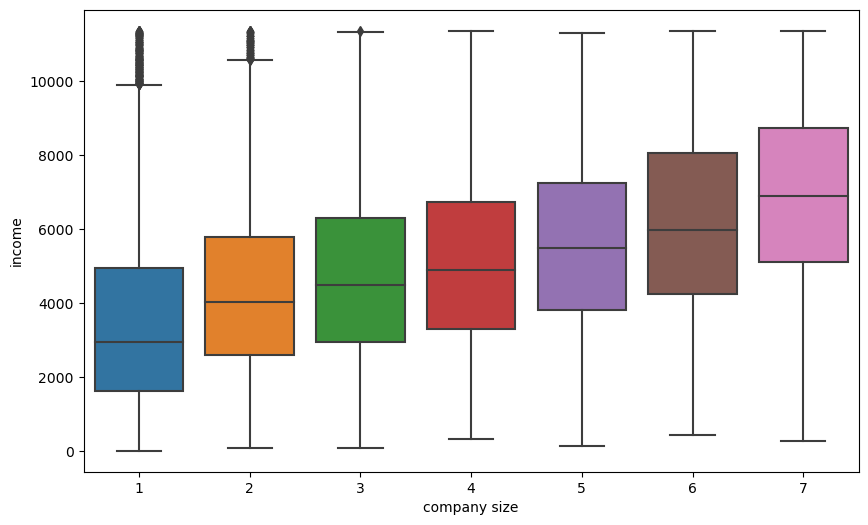

In [32]:
data = df_w[['company_size', 'income']]
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='income', data=data)
plt.xlabel('company size')
plt.ylabel('income')
plt.show()

In [33]:
#income mean에 따라 company_size 다시 나누고 소, 중 대 부여"?????
#grouped_data = data.groupby('company_size')['income'].agg(['mean', 'std'])

#mean_thresholds = [grouped_data['mean'].quantile(1/3), grouped_data['mean'].quantile(2/3)]
#std_thresholds = [grouped_data['std'].quantile(1/3), grouped_data['std'].quantile(2/3)]

#def categorize_company_size(row):
#    company_mean = grouped_data.loc[row['company_size'], 'mean']
#    company_std = grouped_data.loc[row['company_size'], 'std']
    
#    if row['income'] <= mean_thresholds[0] and row['income'] <= std_thresholds[0]:
#        return 'Small'
#    elif row['income'] > mean_thresholds[0] and row['income'] <= std_thresholds[1]:
#        return 'Medium'
#    else:
#        return 'Large'

#df_w['company_category'] = df_w.apply(categorize_company_size, axis=1)
#df_w.drop('company_size', axis=1, inplace=True)
#df_w

In [34]:
#무직자 데이터 프레임 따로 제작
df_n = df[(df['occupation'].isna()) & (~df['reason_none_worker'].isna())]
del df_n['occupation']
del df_n['company_size']
del df_n['year']

In [35]:
#reason_non_worker 정리
df_n.drop(df_n[df_n['reason_none_worker'] == '99'].index, inplace=True)
df_n.drop(df_n[df_n['reason_none_worker'] == '0'].index, inplace=True)
#수민 동호는 11개 전부 확인
df_n['reason_none_worker'].unique()
#민석 예진은 7,8번 합치고 확인
df_n['reason_none_worker'].replace({'8':'7', '9':'1'}, inplace = True)

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\2631905240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop(df_n[df_n['reason_none_worker'] == '99'].index, inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\2631905240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop(df_n[df_n['reason_none_worker'] == '0'].index, inplace=True)
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\2631905240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [36]:
df_n.groupby('reason_none_worker')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
reason_none_worker,,,,,,,,
1,4415.0,1805.323308,1516.750954,0.000000,825.906419,1301.075269,2283.456270,11351.612903
10,16149.0,1742.303381,1517.156535,4.036327,795.328142,1197.049526,2088.726514,11307.377049
11,195.0,2432.911598,1855.911063,17.913593,1232.972649,2075.089392,2994.477376,10460.648148
2,7.0,1270.415032,880.280978,392.133492,801.428378,1181.634712,1337.944295,3040.391677
3,42.0,2318.935734,1557.937925,0.000000,1449.414188,2042.822615,2527.874266,6747.858017
4,607.0,1494.272117,1449.011756,0.000000,633.126197,986.859396,1799.069479,10440.636475
5,283.0,2956.935797,1804.281342,3.161222,1631.971154,2691.598361,3885.044627,8960.648148
6,915.0,2243.537713,1724.007841,69.892473,1089.816944,1737.486096,2894.878227,11321.656051
7,4567.0,1733.847099,1607.588581,0.000000,728.384399,1162.790698,2163.445982,11309.139785


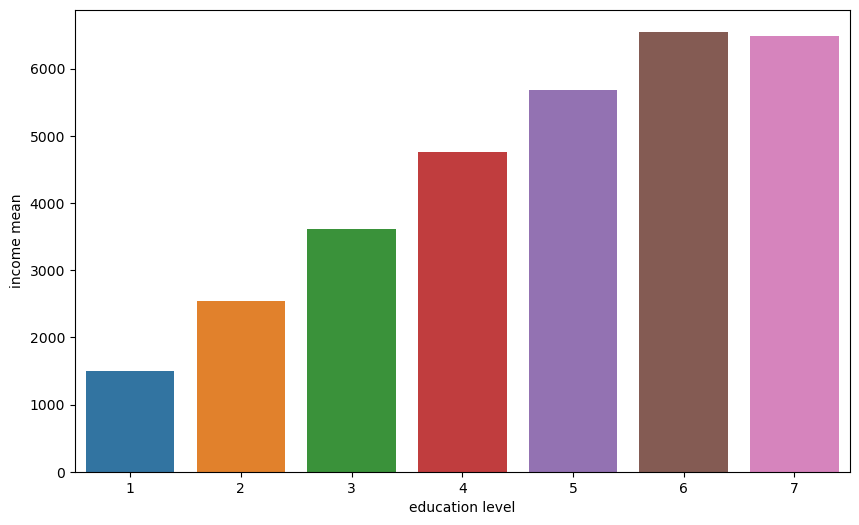

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='income', data=df_w, ci=None)
plt.xlabel('education level')
plt.ylabel('income mean')
plt.show()

In [38]:
df_n[df_n['education_level']<5]

,region,family_member,gender,age,education_level,marriage,reason_none_worker,income
4,0,2,1,60+,2,6,10,1647.540984
10,0,1,2,60+,3,2,10,592.473118
17,0,2,1,60+,3,6,10,1058.401639
19,0,1,2,60+,3,2,4,49.731183
44,0,2,1,60+,3,6,7,1134.638923
...,...,...,...,...,...,...,...,...
78917,0,1,2,60+,2,2,4,664.102564
78918,0,1,1,60+,3,3,10,1835.616438
78922,0,1,2,60+,2,2,1,3124.217119
78925,1,4,1,60+,2,6,7,3728.569271


In [39]:
df_n[(df_n['education_level']<5) & (df_n['age']=='60+')]

,region,family_member,gender,age,education_level,marriage,reason_none_worker,income
4,0,2,1,60+,2,6,10,1647.540984
10,0,1,2,60+,3,2,10,592.473118
17,0,2,1,60+,3,6,10,1058.401639
19,0,1,2,60+,3,2,4,49.731183
44,0,2,1,60+,3,6,7,1134.638923
...,...,...,...,...,...,...,...,...
78917,0,1,2,60+,2,2,4,664.102564
78918,0,1,1,60+,3,3,10,1835.616438
78922,0,1,2,60+,2,2,1,3124.217119
78925,1,4,1,60+,2,6,7,3728.569271


In [40]:
df_n[(df_n['education_level']==5)]

,region,family_member,gender,age,education_level,marriage,reason_none_worker,income
1,0,3,1,60+,5,6,1,1728.557013
22,1,2,1,60+,5,6,1,1026.143791
29,1,2,1,60+,5,6,1,1835.483871
33,0,2,1,50-59,5,6,10,1196.774194
58,0,3,1,60+,5,3,10,6027.245207
...,...,...,...,...,...,...,...,...
78851,0,2,1,60+,5,6,10,1744.994731
78871,0,2,1,60+,5,6,10,2748.738648
78872,0,2,1,60+,5,6,7,1224.462366
78902,1,2,2,50-59,5,2,10,4058.386412


In [41]:
df_n.groupby('education_level')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
2,6652.0,1066.247646,794.956659,0.000000,623.060446,827.186512,1203.554745,9885.245902
3,9288.0,1512.482253,1202.802338,0.000000,788.666783,1139.829843,1786.747340,11109.953704
4,3973.0,1894.941781,1427.625013,0.000000,954.352442,1465.186680,2333.333333,11119.230769
5,4633.0,2442.413737,1809.697261,0.000000,1137.634409,1941.473259,3164.543524,11351.612903
6,407.0,2451.122479,1815.244596,3.161222,1055.982906,1948.748510,3307.039160,10807.165437
7,1905.0,3032.738546,2048.636544,0.000000,1467.805519,2544.662309,4159.065628,11262.004175
8,286.0,4883.401869,2769.776926,341.655716,2835.481180,4601.052252,6813.841451,11143.589744
9,36.0,6840.850889,2177.968562,3131.180626,4921.842393,6626.334235,8421.285564,10729.439809


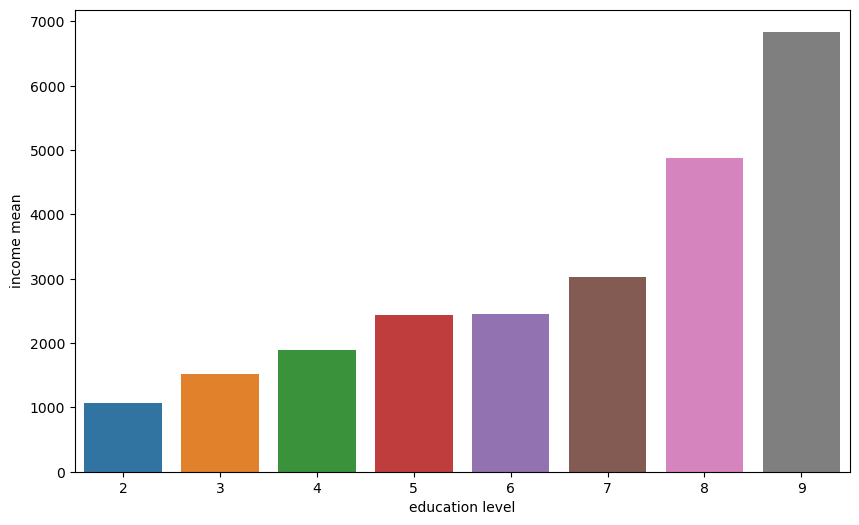

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='income', data=df_n, ci=None)
plt.xlabel('education level')
plt.ylabel('income mean')
plt.show()

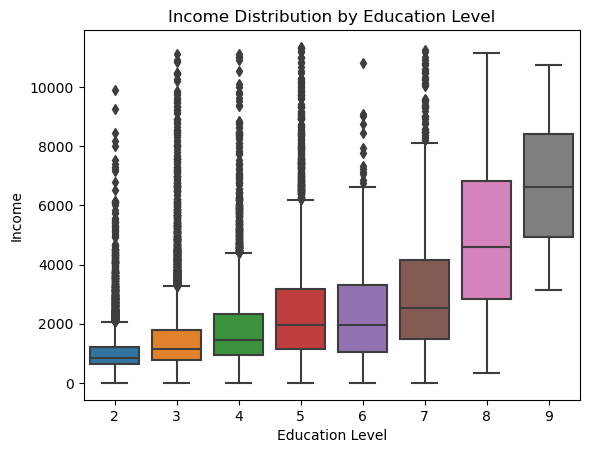

In [43]:
sns.boxplot(x='education_level', y='income', data=df_n)
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Income Distribution by Education Level')
plt.show()

In [44]:
quantiles = df_n.groupby('education_level')['income'].quantile([0.25, 0.5, 0.75]).unstack()
print(quantiles)

                        0.25         0.50         0.75
education_level                                       
2                 623.060446   827.186512  1203.554745
3                 788.666783  1139.829843  1786.747340
4                 954.352442  1465.186680  2333.333333
5                1137.634409  1941.473259  3164.543524
6                1055.982906  1948.748510  3307.039160
7                1467.805519  2544.662309  4159.065628
8                2835.481180  4601.052252  6813.841451
9                4921.842393  6626.334235  8421.285564


In [45]:
df_n['education_level'] = df_n['education_level'].replace({2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8})

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\643475987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['education_level'] = df_n['education_level'].replace({2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8})


In [46]:
df_n['education_level'].unique()

array([4, 1, 2, 5, 6, 3, 7, 8], dtype=int64)

In [47]:
df_n['education_plus'] = np.nan
df_n.loc[df_n['education_level'] == 6, 'education_plus'] = '1'
df_n.loc[df_n['education_level'] == 7, 'education_plus'] = '2'
df_n['education_plus'].fillna('0', inplace=True)

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1524803444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['education_plus'] = np.nan
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1524803444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.loc[df_n['education_level'] == 6, 'education_plus'] = '1'
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1524803444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [48]:
df_n['family_member'].unique()

array([3, 2, 1, 7, 5, 4, 6, 9, 8], dtype=int64)

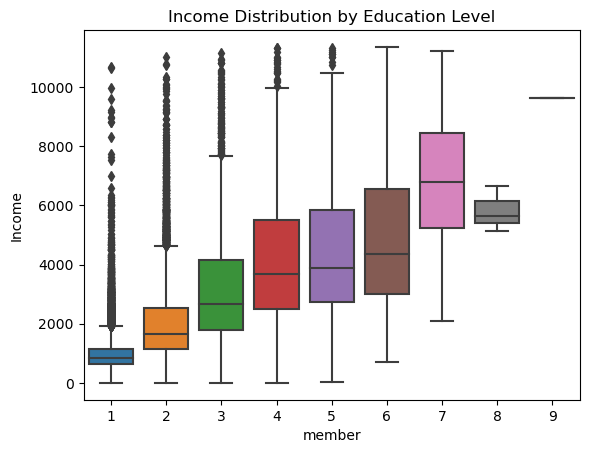

In [49]:
sns.boxplot(x='family_member', y='income', data=df_n)
plt.xlabel('member')
plt.ylabel('Income')
plt.title('Income Distribution by Education Level')
plt.show()

In [50]:
df_n['family_plus'] = np.nan

df_n.loc[df_n['family_member'].isin([4, 5, 6]), 'family_plus'] = '1'
df_n.loc[df_n['family_member'].isin([7, 8, 9]), 'family_plus'] = '2'
df_n['family_plus'].fillna('0', inplace=True)

df_n['family_plus']

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\2629836808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['family_plus'] = np.nan
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\2629836808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.loc[df_n['family_member'].isin([4, 5, 6]), 'family_plus'] = '1'
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\2629836808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

1        0
4        0
10       0
17       0
19       0
        ..
78917    0
78918    0
78922    0
78925    1
78926    0
Name: family_plus, Length: 27180, dtype: object

In [51]:
df_n[df_n['family_plus']=='1']

,region,family_member,gender,age,education_level,marriage,reason_none_worker,income,education_plus,family_plus
249,0,5,1,40-49,3,6,10,1661.501788,0,1
339,0,5,1,60+,3,6,10,4209.129512,0,1
519,1,5,1,50-59,2,6,1,2349.462366,0,1
527,0,5,1,60+,4,6,7,4428.396573,0,1
562,0,5,1,60+,1,6,1,1218.116806,0,1
...,...,...,...,...,...,...,...,...,...,...
78658,0,4,1,60+,1,6,1,1235.215054,0,1
78719,0,4,1,50-59,4,6,1,1235.215054,0,1
78777,1,4,1,60+,2,6,1,1401.881720,0,1
78897,0,4,2,60+,2,2,6,3405.092593,0,1


## Categorical encoding

In [52]:
w_category = ['region', 'marriage', 'occupation', 'gender','age', 'company_plus', 'company_size']
df_w[w_category] = df_w[w_category].astype('object')
w_num=['family_member', 'education_level']

In [53]:
n_category = ['region', 'marriage', 'reason_none_worker', 'gender', 'age', 'education_plus', 'family_plus']
n_num=['family_member', 'education_level']

df_n[n_category] = df_n[n_category].astype('category')
# n_num 열을 숫자형으로 처리
df_n[n_num] = df_n[n_num].astype('int')
df_n[n_category] = df_n[n_category].astype('object')

C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1015831390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n[n_category] = df_n[n_category].astype('category')
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1015831390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n[n_num] = df_n[n_num].astype('int')
C:\Users\82103\AppData\Local\Temp\ipykernel_33764\1015831390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<AxesSubplot:>

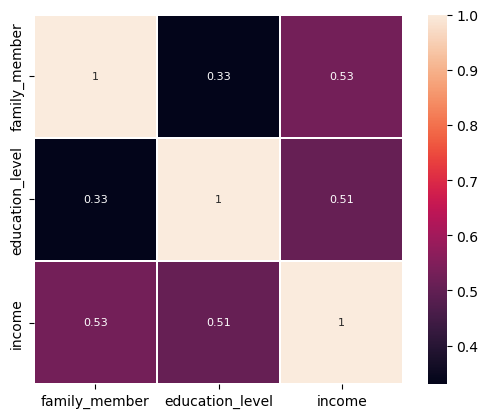

In [54]:
corr = df_w.corr()
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, square = True, linecolor = 'white', annot = True, annot_kws = {'size':8})

<AxesSubplot:>

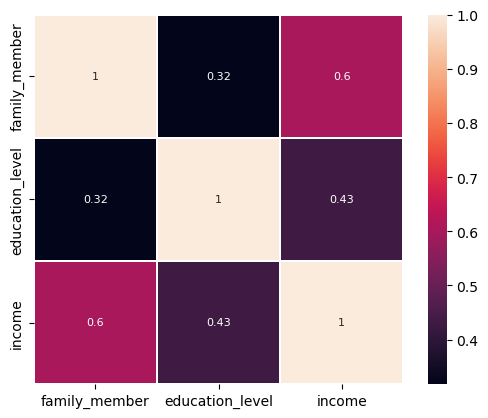

In [55]:
corr = df_n.corr()
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, square = True, linecolor = 'white', annot = True, annot_kws = {'size':8})

In [56]:
df_w_dum = pd.get_dummies(df_w[w_category])

C:\Users\82103\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [57]:
df_n_dum = pd.get_dummies(df_n[n_category])

C:\Users\82103\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [58]:
data_w = pd.DataFrame()
data_w = pd.concat([df_w_dum, df_w[w_num], df_w['income']], axis=1)

In [59]:
columns = data_w.columns
columns

Index(['region_0', 'region_1', 'marriage_2', 'marriage_3', 'marriage_5',
       'marriage_6', 'occupation_1', 'occupation_2', 'occupation_3',
       'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7',
       'occupation_8', 'occupation_9', 'gender_1', 'gender_2', 'age_19-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-49', 'age_50-59',
       'age_60+', 'company_plus_0', 'company_plus_1', 'company_size_1',
       'company_size_2', 'company_size_3', 'company_size_4', 'company_size_5',
       'company_size_6', 'company_size_7', 'family_member', 'education_level',
       'income'],
      dtype='object')

In [60]:
data_n = pd.DataFrame()
data_n = pd.concat([df_n_dum, df_n[n_num], df_n['income']], axis=1)

In [61]:
data_n

,region_0,region_1,marriage_2,marriage_3,marriage_5,marriage_6,reason_none_worker_1,reason_none_worker_10,reason_none_worker_11,reason_none_worker_2,...,age_60+,education_plus_0,education_plus_1,education_plus_2,family_plus_0,family_plus_1,family_plus_2,family_member,education_level,income
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,3,4,1728.557013
4,1,0,0,0,0,1,0,1,0,0,...,1,1,0,0,1,0,0,2,1,1647.540984
10,1,0,1,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,1,2,592.473118
17,1,0,0,0,0,1,0,1,0,0,...,1,1,0,0,1,0,0,2,2,1058.401639
19,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,2,49.731183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78917,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,1,664.102564
78918,1,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,1,2,1835.616438
78922,1,0,1,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,1,3124.217119
78925,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,4,1,3728.569271


# 모델 

In [62]:
seed = 42
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [63]:
pip install pycaret[full]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
from pycaret.regression import *
ixi_model = setup(session_id=seed, data=data_w, target='income', normalize=True, normalize_method='zscore', transformation=True, fold=10)

,Description,Value
0,Session id,42
1,Target,income
2,Target type,Regression
3,Original data shape,"(47326, 36)"
4,Transformed data shape,"(47326, 36)"
5,Transformed train set shape,"(33128, 36)"
6,Transformed test set shape,"(14198, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


In [143]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,635.5259,791299.0569,889.4510,0.8834,0.3153,0.2586,6.7340
catboost,CatBoost Regressor,637.9267,796909.7662,892.5675,0.8826,0.3145,0.2583,9.5150
xgboost,Extreme Gradient Boosting,638.9042,802916.0000,895.9179,0.8817,0.3147,0.2576,5.0610
gbr,Gradient Boosting Regressor,648.4234,808493.5955,899.0707,0.8809,0.3193,0.2644,8.0350
rf,Random Forest Regressor,643.8884,839834.5255,916.2877,0.8762,0.3174,0.2572,5.8870
et,Extra Trees Regressor,654.8993,875116.4469,935.2896,0.8711,0.3261,0.2599,12.2660
dt,Decision Tree Regressor,663.9218,901642.3511,949.3538,0.8671,0.3317,0.2619,5.6680
ada,AdaBoost Regressor,716.7458,915071.8996,956.5323,0.8651,0.3603,0.3157,5.8690
ridge,Ridge Regression,844.3269,1152365.3962,1073.2969,0.8302,0.3411,0.3038,5.6320
lasso,Lasso Regression,844.3983,1152378.2553,1073.3034,0.8302,0.3413,0.3040,7.0280


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

LGBMRegressor(random_state=42)

In [ ]:
default_xgb = create_model('xgboost')
tuned_xgb = tune_model(default_xgb, n_iter=10, optimize='RMSE')
tuned_xgb

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1084.9708,1984282.3750,1408.6456,0.7088,0.4179,0.3972
1,1123.2133,2099783.7500,1449.0631,0.7015,0.4398,0.4356
2,1090.4066,1988497.6250,1410.1410,0.6962,0.4514,0.4108
3,1075.8307,1942387.5000,1393.6957,0.7117,0.4201,0.5166
4,1101.8667,2042509.5000,1429.1639,0.7021,0.4219,0.4000
5,1076.9860,1916890.0000,1384.5179,0.7147,0.4239,0.3979
6,1083.1034,1948765.2500,1395.9818,0.7084,0.4332,0.3974
7,1083.9285,1986018.5000,1409.2617,0.7076,0.4290,0.4239
8,1106.8073,2090924.5000,1446.0029,0.6909,0.4280,0.3923


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:56:01
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
default_cat = create_model('catboost')
tuned_cat = tune_model(default_cat, n_iter=10, optimize='RMSE')
tuned_cat

In [66]:
from pycaret.regression import *
ixi_model = setup(session_id=seed, data=data_n, target='income', normalize=True, normalize_method='zscore', transformation=True, fold=10)

,Description,Value
0,Session id,42
1,Target,income
2,Target type,Regression
3,Original data shape,"(27180, 33)"
4,Transformed data shape,"(27180, 33)"
5,Transformed train set shape,"(19026, 33)"
6,Transformed test set shape,"(8154, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [64]:
default_xgb = create_model('xgboost')
tuned_xgb = tune_model(default_xgb, n_iter=10, optimize='RMSE')
tuned_xgb

NameError: name 'create_model' is not defined

In [ ]:
default_cat = create_model('catboost')
tuned_cat = tune_model(default_cat, n_iter=10, optimize='RMSE')
tuned_cat

In [65]:
seed = 42
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [66]:
from sklearn.preprocessing import StandardScaler

x_w = data_w.drop(columns=['income'], axis=1)
y_w = data_w['income']

xw_train, xw_test, yw_train, yw_test = train_test_split(x_w,
                                                    y_w,
                                                    test_size=0.3,
                                                    random_state=seed)

#print(xw_train.shape, yw_train.shape)

ss = StandardScaler() # 정규화를 위한 과정입니다.
xw_train = ss.fit_transform(xw_train)
xw_test = ss.fit_transform(xw_test)

In [67]:
x_n = data_n.drop(columns=['income'], axis=1)
y_n = data_n['income']

xn_train, xn_test, yn_train, yn_test = train_test_split(x_n,
                                                    y_n,
                                                    test_size=0.3,
                                                    random_state=seed)

#print(xn_train.shape, yn_train.shape)

ss = StandardScaler() # 정규화를 위한 과정입니다.
xn_train = ss.fit_transform(xn_train)
xn_test = ss.fit_transform(xn_test)

In [68]:
import xgboost as xgb
model_w = xgb.XGBRegressor()

model_w.fit(xw_train, yw_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'], # 건들지 말아주세요
              'learning_rate': [0.05], 
              'max_depth': [15],
              'min_child_weight': [4],
              'subsample': [0.8],
              'colsample_bytree': [0.5],
              'n_estimators': [130],
              
             }

xgb_grid_w = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid_w.fit(xw_train,
         yw_train)

print(xgb_grid_w.best_score_)
print(xgb_grid_w.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[15:05:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.7038656316584306
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'min_child_weight': 4, 'n_estimators': 130, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.8}


In [70]:
best_pars_w = xgb_grid_w.best_params_

best_model_w = xgb_grid_w.best_estimator_

In [71]:
y_pred_w = xgb_grid_w.predict(xw_test)
RMSE_w = mean_squared_error(yw_test, y_pred_w)**0.5
RMSE_w

1389.9188435434307

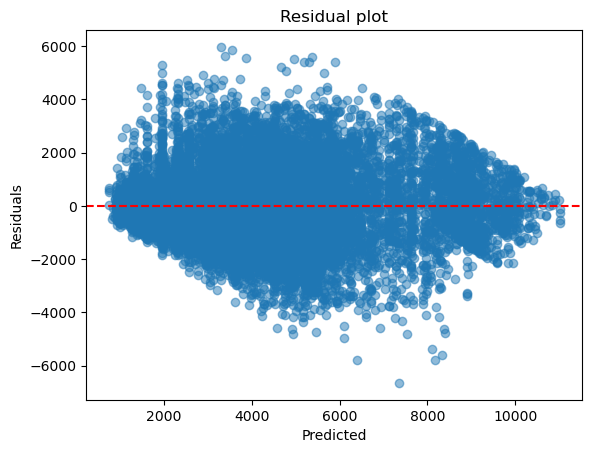

In [72]:
# 예측값과 실제값의 residual 계산
residuals_w = yw_test - y_pred_w

# residual plot 그리기
plt.scatter(y_pred_w, residuals_w, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

In [73]:
!pip install --upgrade joblib

Defaulting to user installation because normal site-packages is not writeable


In [74]:
import joblib
# pickled binary file 형태로 저장된 객체를 로딩한다
#file_name = 'xgboost_worker.pkl'
#joblib.dump(xgb_grid_w, file_name)

In [75]:
#file_name = 'xgboost_worker.pkl'
#final_worker = joblib.load(file_name)
#final_worker

### 무직자의 경우

In [76]:
model_n = xgb.XGBRegressor()

model_n.fit(xn_train, yn_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
xgb2 = xgb.XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'], # 건들지 말아주세요
              'learning_rate': [0.05 ], 
              'max_depth': [5],
              'min_child_weight': [5],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 200],
              
             }

xgb_grid_n = GridSearchCV(xgb2,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid_n.fit(xn_train,
         yn_train)

print(xgb_grid_n.best_score_)
print(xgb_grid_n.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[15:06:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.48978743252678125
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.8}


In [78]:
best_pars_n = xgb_grid_n.best_params_

best_model_n = xgb_grid_n.best_estimator_

In [79]:
y_pred_n = xgb_grid_n.predict(xn_test)
RMSE_n = mean_squared_error(yn_test, y_pred_n)**0.5
RMSE_n

1098.5486726991326

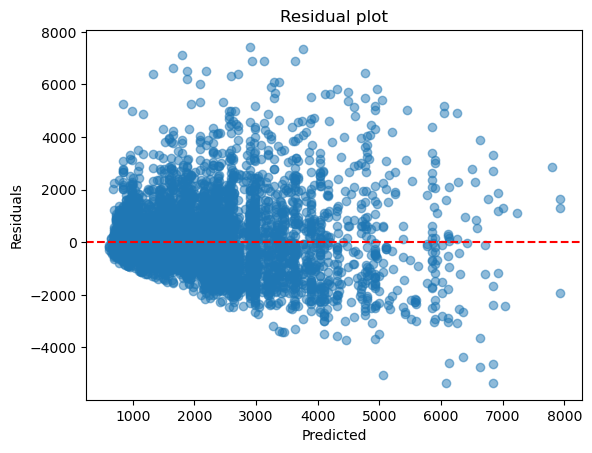

In [80]:
# 예측값과 실제값의 residual 계산
residuals_n = yn_test - y_pred_n

# residual plot 그리기
plt.scatter(y_pred_n, residuals_n, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

## lightGBM

### 재직자의 경우

In [81]:
import lightgbm as lgb

model_l = lgb.LGBMRegressor()

param_l = {
    'objective': ['regression'],  # 이건 건들지 말아주세요
    'num_leaves': [100],
    'min_child_samples': [6],
    'max_depth': [-1],
    'learning_rate': [0.5],
    'reg_alpha': [0.2],
    'metric': ['rmse']  # 평가지표입니다. 건들지 말아ㅜㅈ세요
}

lgb_grid = GridSearchCV(model_l,
                        param_l,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [82]:
lgb_grid.fit(xw_train, yw_train)
print(lgb_grid.best_params_)
print(lgb_grid.best_score_ * -1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'learning_rate': 0.5, 'max_depth': -1, 'metric': 'rmse', 'min_child_samples': 6, 'num_leaves': 100, 'objective': 'regression', 'reg_alpha': 0.2}
1449.2886592620985


In [83]:
y_pred_w_l = lgb_grid.predict(xw_test)
RMSE_l = mean_squared_error(yw_test, y_pred_w_l)**0.5
RMSE_l

1426.3974033191355

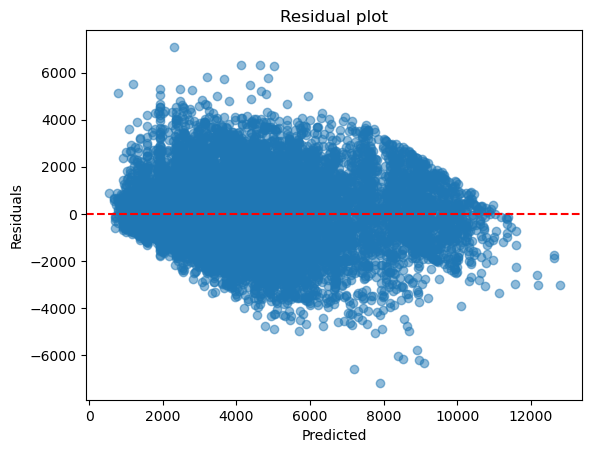

In [84]:
# 예측값과 실제값의 residual 계산
residuals_w_l = yw_test - y_pred_w_l

# residual plot 그리기
plt.scatter(y_pred_w_l, residuals_w_l, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

### 무직자의 경우

In [85]:
import lightgbm as lgb

model_l_n = lgb.LGBMRegressor()

param_l_n = {
    'objective': ['regression'],  # 이건 건들지 말아주세요
    'num_leaves': [100],
    'min_child_samples': [6],
    'max_depth': [-1],
    'learning_rate': [0.5],
    'reg_alpha': [0.2],
    'metric': ['rmse']  # 평가지표입니다. 건들지 말아ㅜㅈ세요
}

lgb_grid_n = GridSearchCV(model_l_n,
                        param_l,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [86]:
lgb_grid.fit(xn_train, yn_train)
print(lgb_grid.best_params_)
print(lgb_grid.best_score_ * -1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'learning_rate': 0.5, 'max_depth': -1, 'metric': 'rmse', 'min_child_samples': 6, 'num_leaves': 100, 'objective': 'regression', 'reg_alpha': 0.2}
1172.6281493056272


In [87]:
y_pred_n_l = lgb_grid.predict(xn_test)
RMSE_l_n = mean_squared_error(yn_test, y_pred_n_l)**0.5
RMSE_l_n

1157.1353898429475

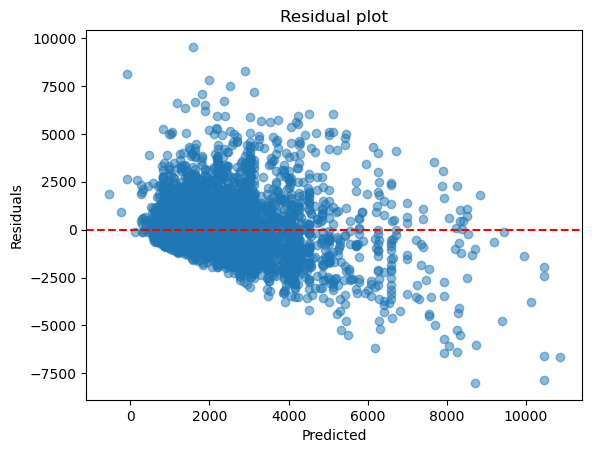

In [88]:
# 예측값과 실제값의 residual 계산
residuals_n_l = yn_test - y_pred_n_l

# residual plot 그리기
plt.scatter(y_pred_n_l, residuals_n_l, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

## CatBoost

### 재직자의 경우

In [89]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [90]:
from catboost import CatBoostRegressor, Pool

model_c = CatBoostRegressor()
param_c = {
    'learning_rate': [0.3],
    'n_estimators': [700],
    'max_depth': [8],
    'loss_function': ['RMSE'],  # 평가지표입니다. 건들지 말아주세요.
    'colsample_bylevel': [0.5]
}
cat_grid = GridSearchCV(model_c,
                        param_c,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [91]:
cat_grid.fit(xw_train, yw_train)
#print(cat_grid.best_params_)
#print(cat_grid.best_score_ * -1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 2144.3197029	total: 151ms	remaining: 1m 45s
1:	learn: 1853.2366068	total: 160ms	remaining: 55.8s
2:	learn: 1691.0144403	total: 166ms	remaining: 38.6s
3:	learn: 1594.6201053	total: 173ms	remaining: 30.1s
4:	learn: 1533.5042622	total: 181ms	remaining: 25.1s
5:	learn: 1499.1897781	total: 188ms	remaining: 21.7s
6:	learn: 1477.8958745	total: 195ms	remaining: 19.3s
7:	learn: 1464.2429752	total: 202ms	remaining: 17.5s
8:	learn: 1454.1785254	total: 210ms	remaining: 16.1s
9:	learn: 1447.1081610	total: 216ms	remaining: 14.9s
10:	learn: 1441.6213635	total: 224ms	remaining: 14s
11:	learn: 1437.3882990	total: 230ms	remaining: 13.2s
12:	learn: 1431.3866130	total: 237ms	remaining: 12.5s
13:	learn: 1427.7299938	total: 244ms	remaining: 11.9s
14:	learn: 1425.4338261	total: 250ms	remaining: 11.4s
15:	learn: 1423.3748116	total: 258ms	remaining: 11s
16:	learn: 1419.8571235	total: 266ms	remaining: 10.7s
17:	learn: 1416.8987726	total: 274ms

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DBA7300EB0>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5], 'learning_rate': [0.3],
                         'loss_function': ['RMSE'], 'max_depth': [8],
                         'n_estimators': [700]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [92]:
y_pred_c_w = cat_grid.predict(xw_test)
RMSE_c_w = mean_squared_error(yw_test, y_pred_c_w)**0.5
RMSE_c_w

1415.6293585941228

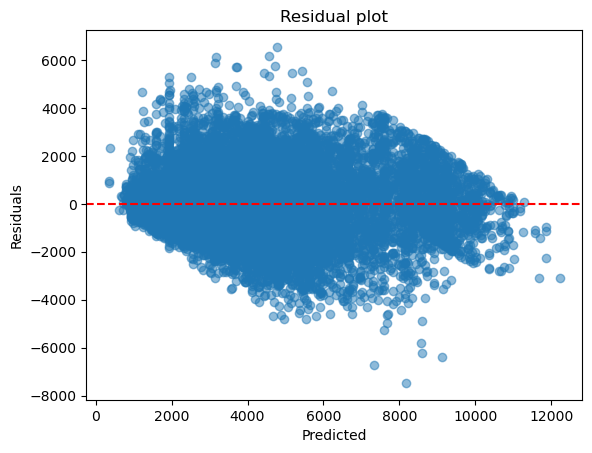

In [93]:
# 예측값과 실제값의 residual 계산
residuals_w_c = yw_test - y_pred_c_w

# residual plot 그리기
plt.scatter(y_pred_c_w, residuals_w_c, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

### 무직자의 경우

In [97]:
model_c_n = CatBoostRegressor()
param_c_n = {
    'learning_rate': [0.3],
    'n_estimators': [700],
    'max_depth': [8],
    'loss_function': ['RMSE'],  # 평가지표입니다. 건들지 말아주세요.
    'colsample_bylevel': [0.5]
}
cat_grid_n = GridSearchCV(model_c_n,
                        param_c_n,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [98]:
cat_grid.fit(xn_train, yn_train)
#print(cat_grid.best_params_)
#print(cat_grid.best_score_ * -1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 1369.8116956	total: 8.99ms	remaining: 6.28s
1:	learn: 1267.5379908	total: 17.1ms	remaining: 5.96s
2:	learn: 1202.4650208	total: 24.8ms	remaining: 5.76s
3:	learn: 1167.5099303	total: 32.9ms	remaining: 5.72s
4:	learn: 1141.5648980	total: 41.3ms	remaining: 5.74s
5:	learn: 1130.5372426	total: 49ms	remaining: 5.66s
6:	learn: 1118.9998255	total: 56.5ms	remaining: 5.59s
7:	learn: 1110.4391255	total: 64.8ms	remaining: 5.61s
8:	learn: 1103.2584252	total: 73.4ms	remaining: 5.63s
9:	learn: 1100.6515620	total: 80.5ms	remaining: 5.55s
10:	learn: 1096.2843875	total: 87.9ms	remaining: 5.51s
11:	learn: 1090.9922146	total: 96.4ms	remaining: 5.53s
12:	learn: 1088.8428379	total: 104ms	remaining: 5.5s
13:	learn: 1086.7433119	total: 110ms	remaining: 5.39s
14:	learn: 1085.2212171	total: 118ms	remaining: 5.38s
15:	learn: 1083.2130675	total: 126ms	remaining: 5.37s
16:	learn: 1080.8361637	total: 133ms	remaining: 5.34s
17:	learn: 1080.5607973	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DBA7300EB0>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5], 'learning_rate': [0.3],
                         'loss_function': ['RMSE'], 'max_depth': [8],
                         'n_estimators': [700]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [100]:
y_pred_c_n = cat_grid.predict(xn_test)
RMSE_c_n = mean_squared_error(yn_test, y_pred_c_n)**0.5
RMSE_c_n

1140.1330313963365

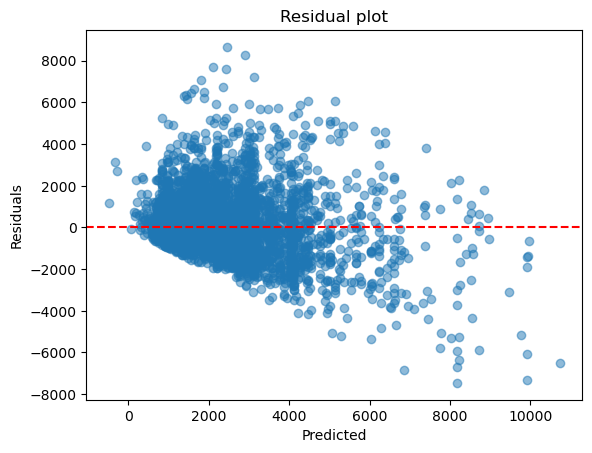

In [101]:
# 예측값과 실제값의 residual 계산
residuals_n_c = yn_test - y_pred_c_n

# residual plot 그리기
plt.scatter(y_pred_c_n, residuals_n_c, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()